John Park (UBID: 50285417)

MTH 448

Feb. 26, 2023

# Classifying Handwritten Digits with k-NN Algorithm

## Introduction

The MNIST database consists of $60,000$ images of handwritten digits ranging from $0$ to $9$. Each image has numerical label. The main task of the project is building unsupervised machine learning to recognize handwritten digits from the MNIST database. The process involves k-Nearest-Neighbor classification algorithm for machine learning system. The purpose of the project is to develop a function implementing the k-NN classification algorithm and apply it to the MNIST image dataset for further investigation such as relationship between classifying label on image and the number of neighbors used for classifying.

The Project involves two parts. The objective of the first part is implementation of the k-NN algorithm from scratch using Python and NumPy. The knn_classifier() function should take in four arguments, including the training data, training labels, a data point to classify, and the number of neighbors to use for classification. The function returns a tuple with the predicted label of the point and a list of rows numbers of training_data that are the n nearest neighbors of the data point. The second part starts with applying the k-NN classifier to the MNIST database and further investigates its performance. The exploration should consider the impact of the size of the training set and the number of neighbors on classification accuracy. Furthermore, the weighted k-NN algorithm can be used to assign weights to neighbors based on their distance from the data point being classified, and the accuracy of new algorithm can be compared to the standard k-NN algorithm. Then, further investiation covers analyzing images classified incorrectly to determine the cause of misclassification. Moreover, the fraction of images that were correctly classified with perfect certainty will be evaluated, as well as the number of images for which no neighbor had the correct label or all neighbors had the same incorrect label.

## Part 1. Building k-NN Classifier

In advance of the whole project, the first step is importing numpy as np for using numpy array, gzip for reading and opening MNIST image and label files, KMeans from sklearn.cluster for plotting clusters of MNIST data, mode from statistics for finding the most frequent data, and ListedColorMap from matplotlib.colors for coloring the plots of data.

In [392]:
%pylab inline
import gzip
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from statistics import mode
from matplotlib.colors import ListedColormap

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Finding Distances Between Points

Before creating k-NN classification method, the method that calculate the euclidean distances is built so that the classifying method can be more readable and brief overall.

In [684]:
#Method that calculates the distance between two points
#X: 2D numpy array, w: 1D numpy array that should be calssified
#linalg.norm originally returns matrix or vector norm so it can be used as calculating euclidean distances
#when axis = 1 is defined, which specifies the axis along which the norm will be computed 
def distance(arr, w):
    return np.linalg.norm(arr-w, axis = 1)  

#### knn Classification Method

This is k-NN algorithm that classifies the neighbors by finding mode of labels of neighbors.

In [685]:
#Method that classifies by implementing k-NN calssification algorithm
#training_data: 2D numpy array (each row is one element)
#training_labels: 1D numpy array (labels of training data; n-th label is for n-th element)
#x: 1D numpy array of Data Point to classify
#n: Number of neighbors to use to classify and predict label of x
def knn_classifier(training_data, training_labels, x, n):
    dist = distance(training_data, x)                  #numpy array that stores the distances between x and other data
    neighbors_array = np.argsort(dist)                 #numpy array that sorted dist array in ascending order
    neighbors = neighbors_array[:n]                    #slice neighbors_array: stores only n-closest data
    
    neighbors_labels = training_labels[neighbors_array] #numpy array that stroes labels in ascending order of distance
    labels = neighbors_labels[:n]                       #slice neighbors_labels: stores labels of n-closest points
    label = mode(labels)                                #find the most frequent labels
    #Return tuple with most frequent label(predicted label) and n-closest points
    return (label, neighbors)                           

## Part 2. Implement the k-NN Classification Algorithm

### Main Code to Apply knn_classifier() Method to MNIST Data

MNIST data consists of two files: images of digits and corresponding labels, so the first step of applying is opening and reading MNIST data.

In [676]:
img_file = "train-images-idx3-ubyte.gz"                        #the Name of Images file saved
labels_file = "train-labels-idx1-ubyte.gz"                     #the Name of Labels file saved

#Open the Images file in binary mode to read and write using byte data
with gzip.open(img_file, 'rb') as foo1:                        
    f1 = foo1.read()
    
#Open the Labels file in binary mode to read and write using byte data   
with gzip.open(labels_file, 'rb') as foo2:
    f2 = foo2.read()

#Method of Reshaping Images file and Changing both files into numpy array so that they can be adjusted by numpy mehtod
def get_MNIST():
    images = np.array([b for b in f1[16:]]).reshape(-1, 28*28)
    labels = np.array([b for b in f2[8:]])
    return images, labels                                      #Return reshaped files into (images, labels)

In [762]:
images = get_MNIST()[0]                  #From the get_MNIST() Method above, bring Images
labels = get_MNIST()[1]                  #From the get_MNIST() Method above, bring Labels of Images
n1 = 4                                   #Number of Neighbors to use for classifying label fo point
n2 = 6                                   #Number of Neighbors to use for classifying label fo point
n3 = 8                                   #Number of Neighbors to use for classifying label fo point
n4 = 10                                  #Number of Neighbors to use for classifying label fo point
size_Train_Test = 35000                  #Training Data Size
train_X = images[:size_Train_Test]       #Training Data for Image Data
train_y = labels[:size_Train_Test]       #Training Data for Label Data
test_X = images[size_Train_Test:36000]   #Test Data for Image Data: Size of test data is 1000
test_y = labels[size_Train_Test:36000]   #Test Data for Label Data: Size of test data is 1000
predict_Labels = []                      #Empty Array to store all predicted labels
correct_Result = []                      #Empty Array to store predicted labels that are correct
wrong_Result = []                        #Empty Array to store predicted labesl that are wrong

In [763]:
#For loop from 0 to the (length of test data)-1 in order to classify all the test data
for i in range(len(test_X)):
    #preLables is label predicted from knn_classifier
    #preNeighbors is n2 number of most closest points from the point to classify
    preLabels, preNeighbors = knn_classifier(train_X, train_y, test_X[i], n2)
    predict_Labels.append(preLabels)              #Append preLabels to predict_Lables
    if(preLabels == test_y[i]):                   #Check if preLabels is the same with original label of certain point
        correct_Result.append(i)                  #if yes, Append correct preLabels to correct_Result
    else:                                         
        wrong_Result.append(i)                    #if not, Append wrong preLabels to wrong_Result

In any experiment, it is important to check if certain process and answer are appropriate and generates resonable answer and data. The most frequently used method of checking is measuring the accuracy of data compared to the original or given data. For this classification, the accuracy is measured to check how many correct results knn_classifier() has produced through k-NN classification algorithm. Thus, measurement is 
<br>
<br>
$$\frac{Length\space of\space Correct\space Result}{Length\space of\space Test\space of\space Label\space Data}$$

#### Accuracy Test of knn_classifier() Method

The following code is the example of measuring accuracy.

In [764]:
accuracy = len(correct_Result)/len(test_y)
accuracy

0.973

As mentioned in the introduction, the change of accuracy of the knn_classifier() is investigated depended on the size of training set and the number of neighbors of point being classified. The outputs are shown on the tables below.

#### Table for Accuracy Depended on Training Set Size

|Training Set Size|Accuracy|
|---|---|
|<p style="text-align: center;">15000</p>|<p style="text-align: center;">0.951</p>|
|<p style="text-align: center;">20000</p>|<p style="text-align: center;">0.965</p>|
|<p style="text-align: center;">25000</p>|<p style="text-align: center;">0.961</p>|
|<p style="text-align: center;">30000</p>|<p style="text-align: center;">0.966</p>|
|<p style="text-align: center;">35000</p>|<p style="text-align: center;">0.973</p>|
|<p style="text-align: center;">40000</p>|<p style="text-align: center;">0.970</p>|

Genenrally, the accuracy of this algorith increases as the size of training set increases. The training set with the highest accuracy is training set with size of $35000$. This training set will be used for the standard of the further explorations.

#### Tabel for Accuracy Depended on Number of Neighbors

|Number of Neighbors|Accuracy|
|---|---|
|<p style="text-align: center;">n1(4)</p>|<p style="text-align: center;">0.973</p>|
|<p style="text-align: center;">n2(6)</p>|<p style="text-align: center;">0.973</p>|
|<p style="text-align: center;">n3(8)</p>|<p style="text-align: center;">0.973</p>|
|<p style="text-align: center;">n4(10)</p>|<p style="text-align: center;">0.971</p>|

In any number of neighbors, the accuracy of this algorithm is over $0.97$, which is over $97\%$ correctness. Thus, from three cases that have $0.973$ accuracy, $n2$ ($6$ neighbors) is chosen for the next investigation comparing the accuracy with alternative classification.

### Alternative Classification: Weighted k-NN Classification Algorithm

In speaking of k-NN classification algorithm, there is alternative tool for finding label of point. Depending on the distance from $x$, weight is assigned to each neighbor. The bigger the weight is, the closer the point is. Now, the following code is for weighted k-NN algorithm.

In [697]:
#Method that classifies by implementing k-NN calssification algorithm
#training_data: 2D numpy array (each row is one element)
#training_labels: 1D numpy array (labels of training data; n-th label is for n-th element)
#x: 1D numpy array of Data Point to classify
#n: Number of neighbors to use to classify and predict label of x
def weighted_knn(training_data, training_labels, x, n):
    dist = distance(training_data, x)                  #numpy array that stores the distances between x and other data
    neighbors_array = np.argsort(dist)                 #numpy array that sorted dist array in ascending order
    neighbors = neighbors_array[:n]                    #slice neighbors_array: stores only n-closest data
    
    neighbors_labels = training_labels[neighbors_array]#numpy array that stroes labels in ascending order of distance
    labels = neighbors_labels[:n]                      #slice neighbors_labels: stores labels of n-closest points
    
    weight = 1/dist[neighbors_array]                   #numpy array that has the weight of each neighbor
    weight_count = np.zeros(10)                        #make numpy array of 10 numbers of zeros
    for i in range(n):                                 #loop from 0 to n-1
        weight_count[labels[i]] += weight[i]           #store label and weight as dictionary
    label = np.argmax(weight_count)                    #find the label with the largest weight
    
    return (label, neighbors)                          #Return most frequent label(predicted label), n-closest points

In [698]:
weight_predict_Labels = []          #Empty Array to store all predicted labels from weighted_knn
weight_correct_Result = []          #Empty Array to store predicted labels that are correct from weighted_knn
weight_wrong_Result = []            #Empty Array to store predicted labesl that are wrong from weighted_knn

In [699]:
#For loop from 0 to the (length of test data)-1 in order to classify all the test data
for i in range(len(test_X)):
    #preLables is label predicted from weighted_knn
    #preNeighbors is n2 number of most closest points from the point to classify
    preLabels, preNeighbors = weighted_knn(train_X, train_y, test_X[i], n2)
    weight_predict_Labels.append(preLabels)    #Append preLabels to weight_predict_Lables
    if(preLabels == test_y[i]):                #Check if preLabels is the same with original label of certain point
        weight_correct_Result.append(i)        #if yes, Append correct preLabels to weight_correct_Result
    else:
        weight_wrong_Result.append(i)          #if not, Append wrong preLabels to weight_wrong_Result

As mentioned above, in order to check its completion, the accuracy has been measured with the formula stated before.

#### Accuracy Test of weighted_knn() Method

In [700]:
weight_accuracy = len(weight_correct_Result)/len(test_y)
weight_accuracy

0.973

The accuracy of weight_knn algorithm is the same as that of the original k-NN algorithm.

### Examples of Wrong Images

The accuracy of $0.973$ is fairly high. However, unless it is not $1.0$, a few wrong results exist. Here are the amount of wrong results and the images of them.

In [707]:
len(wrong_Result)

27

Out of $1000$ test data, the k-NN algorithm made $27$ wrong predictions. Now, the following code will visualize the images of wrong results and with what number the k-NN algorithm made confusion.

In [722]:
#Method that visualize the wrong results (wrong precitions for label)
def visualize_WrongIm(indicies):
    total_Size = len(indicies)                               #find the number of wrong results
    fig, axs = plt.subplots(total_Size, figsize=(15, 30))    #Make a subplot that will have images of wrong results
    fig.suptitle(str(len(indicies))+" Wrong Images", y=1.01) #Title of whole subplot
    fig.tight_layout(h_pad = 2)                              #Make a pad for each plot
    #Loop through the subplot
    #Set title for each image (original label and predicted label)
    #Reshape each image data
    #Show all plots
    for i, ax in enumerate(axs):
        ax.set_title("Original:" + str(test_y[indicies[i]]) + ", Wrong:" + str(predict_Labels[indicies[i]]))
        ax.imshow(test_X[indicies[i]].reshape(28,28),cmap='Greys')
        ax.axis("off")
    plt.show()

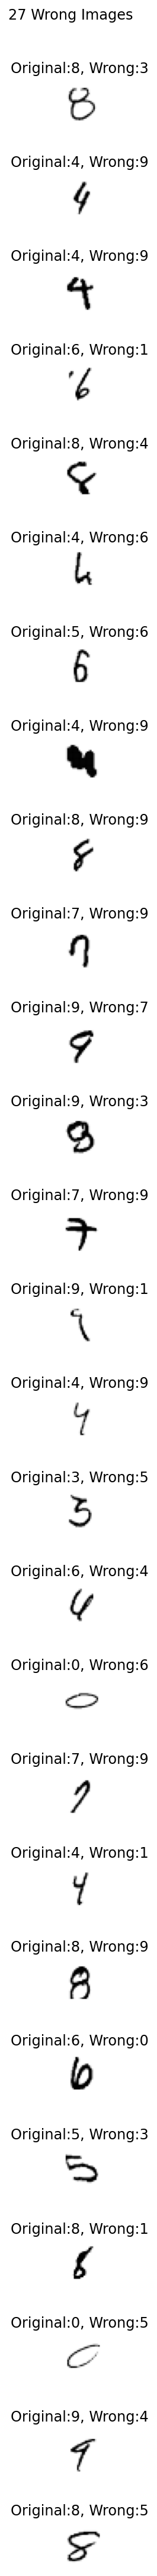

In [723]:
visualize_WrongIm(wrong_Result)

From the above images, a substantial portion of wrong results is vaguely written. For example, $4$ and $7$ are very indistinguishable from $9$ since they are written much longer, and in some cases, those long digits are also classified as $1$. More of similar cases exist; as a result, most of wrong results are reasonable.

In order to make better solutions, it is important to reflect and observe what the problems are. Thus, from the wrong results, the most confused original digit and the most confused wrong digit can be found, and with them, it is possible to study the problems of worng results.

In [357]:
#Method that find the most confused original digit and the most confused wrong digit
def most_Confused_Digits(indicies):
    total_Size = len(indicies)                             #find the number of wrong results
    confused_Original = []                                 #array that store the label of wrong original digits
    confused_Wrong = []                                    #array that store the label of wrong predicted digits
    for i in range(total_Size):                            #Loop from 0 to (number of wrong results)-1
        confused_Original.append(test_y[indicies[i]])      #append the label of wrong original digits
        confused_Wrong.append(predict_Labels[indicies[i]]) #append the label of wrong predicted digits
    result1 = mode(confused_Original)                      #Find the most frequent labels of wrong original digits
    result2 = mode(confused_Wrong)                         #Find the most frequent labels of wrong predicted digits
    return result1, result2                                #Return

In [719]:
most_Confused_Digits(wrong_Result)

(8, 9)

The result tells that $8$ is the most frequent original digits that were wrong, and $9$ is the most frequent predicted digits that were classified wrong. It can be concluded that the digit $8$ is usually more difficult to classify.

### Relationships Between Classifying Images and Their Neighbors - 1

The first part inquires into the relationshps between images and their neighbors, and the correct results will be investigated.

In [721]:
len(correct_Result)         #The size of the correct results

973

Out of the correct results, there are images correctly classified with perfect certainty, which means that all their neighbors had the same label. Following codes are to find the fraction of perfect certainty.

In [710]:
#The method to check if all elements of array are the same is built 
#so that the main method has more readable code
def arrElement_Same(arr):
    result = np.all(arr == arr[0])          #Check if all elements are the same by comparing all to the first element
    return result                           

In [745]:
#Method that gives the fraction of perfect certainty
def perfect_Certainty(indicies):
    total_Correct = len(indicies)                   #find the number of correct results
    perfect_Correct = 0                             #variabel that will store the fraction of perfect certainty
    #Loop from 0 to (number of correct results)-1
    #c_label is correct label predicted from knn_classifier
    #c_neighbors is certain number of most closest points from the point to classify
    #make a numpy array that stores the labels of all neighbors
    for i in range(total_Correct):
        c_label, c_neighbors = knn_classifier(train_X, train_y, test_X[indicies[i]], n2)
        neighbors_label = [labels[j] for j in c_neighbors]
        #Check if all elements are the same with arrElement_Same method
        #If true, add 1 to perfect_Correct
        if arrElement_Same(neighbors_label):
            perfect_Correct += 1
    #print the number of results with perfect certainty
    print(perfect_Correct)
    #perfect certainty is number of perfectly correct results divided by total number of correct results
    out_Perfect_Correct = perfect_Correct / total_Correct
    return out_Perfect_Correct

In [746]:
perfect_Certainty(correct_Result)

866


0.8900308324768756

Using the method above, fraction of perfect certainty is shown in the following table.

#### Table for Relationships Between Images and Their Neighbors of Correct Results

|Number of Neighbors|Perfect Certainty|
|---|---|
|<p style="text-align: center;">n1</p>|<p style="text-align: center;">0.932</p>|
|<p style="text-align: center;">n2</p>|<p style="text-align: center;">0.890</p>|
|<p style="text-align: center;">n3</p>|<p style="text-align: center;">0.851</p>|
|<p style="text-align: center;">n4</p>|<p style="text-align: center;">0.818</p>|

From the table, increase of number of neighbors results in the decrease of the perfect certainty. It is reasonable since the more neighbors there are, the further points have been selected, which means it may have the other label.

### Relationships Between Images and Their Neighbors - 2

In the second part of this investigation, wrong results will be studied.

In case of wrong results, three different relationships will be investigated. The first case is when all neighbors have the same label, which was called perfect certainty in part 1. The next one is when no neighbors have the correct label, and the last one is when wrong label is a mode.

In [743]:
#Method that investigate the wrong results
def not_Perfect_Certainty(indicies):
    total_Wrong = len(indicies)      #find the number of wrong results
    perfect_But_Wrong = 0            #variabel that will store the fraction of perfect certainty
    all_Neighbor_Wrong = 0           #variabel that will store the fraction of all wrong labels
    not_Mode = 0                     #variabel that will store the fraction of wrong mode
    #Loop from 0 to (the number of wrong results)-1
    #w_label is correct label predicted from knn_classifier
    #w_neighbors is certain number of most closest points from the point to classify
    #make a numpy array that stores the labels of all neighbors
    for k in range(total_Wrong):
        w_label, w_neighbors = knn_classifier(train_X, train_y, test_X[indicies[k]], n2 )
        neighbors_label = [labels[j] for j in w_neighbors]
        #If all elements in neighbors_label are the same, add 1 to perfect_But_Wrong
        if arrElement_Same(neighbors_label):
            perfect_But_Wrong += 1
        #If no elements in neighbors_label have the correct label, add 1 to all_Neighbor_Wrong
        elif (test_y[indicies[k]] not in neighbors_label):
            all_Neighbor_Wrong += 1
        #If none is true, that means wrong number is mode, so add 1 to not_Mode
        else:
            not_Mode += 1
    #Return outputs are fractions that each factor is divided by total number of correct results
    out_Perfect_But_Wrong = perfect_But_Wrong / total_Wrong
    out_All_Neighbor_Wrong = all_Neighbor_Wrong / total_Wrong
    out_Not_Mode = not_Mode / total_Wrong
    return(out_Perfect_But_Wrong, out_All_Neighbor_Wrong, out_Not_Mode)

In [744]:
not_Perfect_Certainty(wrong_Result)

(0.2222222222222222, 0.07407407407407407, 0.7037037037037037)

The following table is about wrong results. It gives the fraction of perfect certainty, all wrong neighbor, wrong mode.

#### Table for Relationships Between Images and Their Neighbors of Wrong Results

|Number of Neighbors|Perfect But Wrong|All Neighbor Wrong|Not Mode|
|---|---|---|---|
|<p style="text-align: center;">n1</p>|<p style="text-align: center;">0.222</p>|<p style="text-align: center;">0.111</p>|<p style="text-align: center;">0.667</p>|
|<p style="text-align: center;">n2</p>|<p style="text-align: center;">0.222</p>|<p style="text-align: center;">0.074</p>|<p style="text-align: center;">0.704</p>|
|<p style="text-align: center;">n3</p>|<p style="text-align: center;">0.222</p>|<p style="text-align: center;">0.037</p>|<p style="text-align: center;">0.741</p>|
|<p style="text-align: center;">n4</p>|<p style="text-align: center;">0.185</p>|<p style="text-align: center;">0.037</p>|<p style="text-align: center;">0.778</p>|

Table represents that the increase of number of neighbors results in the decrease of the perfect certainty and all wrong labels; however, the ratio of wrong mode to wrong results increases. It is reasonable since the more neighbors there are, the further points have been selected, which means it may have the other label. Then, in case of all wrong labels, images with the correct label near the classifying image may be chosen.

## Conclusions

Overall, the main goal of this project was implementing k-NN classification algorithm and recognizing handwritten digits in MNIST database. The python function, knn_classifier() is designed to classify images based on their distance to the nearest neighbors in the training set. Then, it is applied to the MNIST dataset, and the performance of the algorithm is analyzed. The accuracy of the k-NN algorithm is observed by changing the size of the training set and the number of neighbors used for classification. Also it is discovered that the use of weighted k-NN can does not really affect the accuracy much. Additionally, we observed that some digits were more difficult to classify accurately than others, and identified common misclassifications. In conclusion, the project provided valuable insights into the use of the k-NN classification algorithm for recognizing handwritten digits. Exploring different aspects of the algorithm and analyzing its performance can be useful in developing more accurate models for recognizing handwritten digits and other similar applications.

## References

GeeksforGeeks. (2018, October 15). Python numpy. GeeksforGeeks. Retrieved February 26, 2023, from https://www.geeksforgeeks.org/python-numpy/ 